## 연습 : 아마존 데이터
평점 분포 분석
카테고리별 평균 평점 차이

평점 분포

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\wjddn\OneDrive\Desktop\새 폴더\amazon.csv")

In [3]:
#원본은 amazon으로 카피해서 따로 보관
amazon = df.copy()

In [4]:
print(df.shape)
df.info()

(1465, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object


16컬럼,1465행 결측치 rating_count에서만 3개 존재

데이터 타입에는 숫자형이 없음, 숫자형으로 변환 할 필요가 있는 데이터는 변환예정

In [5]:
#중복값 확인
df.duplicated().sum()

np.int64(0)

In [6]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
#약1460개행중 결측치는 3개 비율상 드랍해도 지장이 없을정도로 미미함으로 드랍후 인덱스 리셋
df = df.dropna().reset_index()

평점 평점수 가격등은 자료형 -> 숫자형으로 변경

가격같은 경우 통화확인

In [8]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [9]:
# rating에서 숫자형태가 아닌 값은 드랍
df = df[df['rating'] != '|'].reset_index()

In [10]:
# rating 을 자료형 -> 숫자형
df['rating'] = df['rating'].astype(float)

In [11]:
df['rating_count'] = (
    df['rating_count']
    .str.replace(',', '', regex=False)
    .astype(float)
)


In [12]:
df['discount_percentage'] = (
    df['discount_percentage']
    .str.replace('%', '', regex=False)
    .astype(float)
)

In [13]:
# 통화기호가 통일인지 확인할 필요가 있으므로 통화기호 먼저 확인
sym = df["discounted_price"].astype(str).str.replace(r"[\d.,\s-]", "", regex=True)
print(sym.unique())

sym1 = df['actual_price'].astype(str).str.replace(r"[\d.,\s-]", "", regex=True)
print(sym1.unique())


['₹']
['₹']


통화 기호는 통일한것으로 확인

₹ = 인도 통화 단위
통화단위가 통일해서 다른 변경없이 자료 -> 숫자로 변경

In [14]:
df['discounted_price'] = (
    df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex = False).astype(float)
)

In [15]:
df['actual_price'] = (
    df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex = False).astype(float)
)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              1462 non-null   int64  
 1   index                1462 non-null   int64  
 2   product_id           1462 non-null   object 
 3   product_name         1462 non-null   object 
 4   category             1462 non-null   object 
 5   discounted_price     1462 non-null   float64
 6   actual_price         1462 non-null   float64
 7   discount_percentage  1462 non-null   float64
 8   rating               1462 non-null   float64
 9   rating_count         1462 non-null   float64
 10  about_product        1462 non-null   object 
 11  user_id              1462 non-null   object 
 12  user_name            1462 non-null   object 
 13  review_id            1462 non-null   object 
 14  review_title         1462 non-null   object 
 15  review_content       1462 non-null   o

category는 대분류부분만 남게끔 정리

In [17]:
df['category'] = df['category'].str.replace('&',' ',regex=False)
df['category'] = df['category'].str.split('|').str[0]

In [18]:
df.head()

,level_0,index,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,0,0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers Accessories,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,1,1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers Accessories,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,2,2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers Accessories,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,3,3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers Accessories,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,4,4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers Accessories,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [19]:
#reset index로 필요없는 컬럼이 생김 필요없는 컬럼은 드랍.
df = df.drop('level_0',axis = 1)
df = df.drop('index',axis = 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   o

In [ ]:
#자료형에서 숫자형으로 바꾼 컬럼들 이상치 확인
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.500000
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


가격부분 비정상적으로 높다 생각할만큼 값이 큰 부분과 평점 수 역시 확인이 필요해 보임

Text(0.5, 0, 'count')

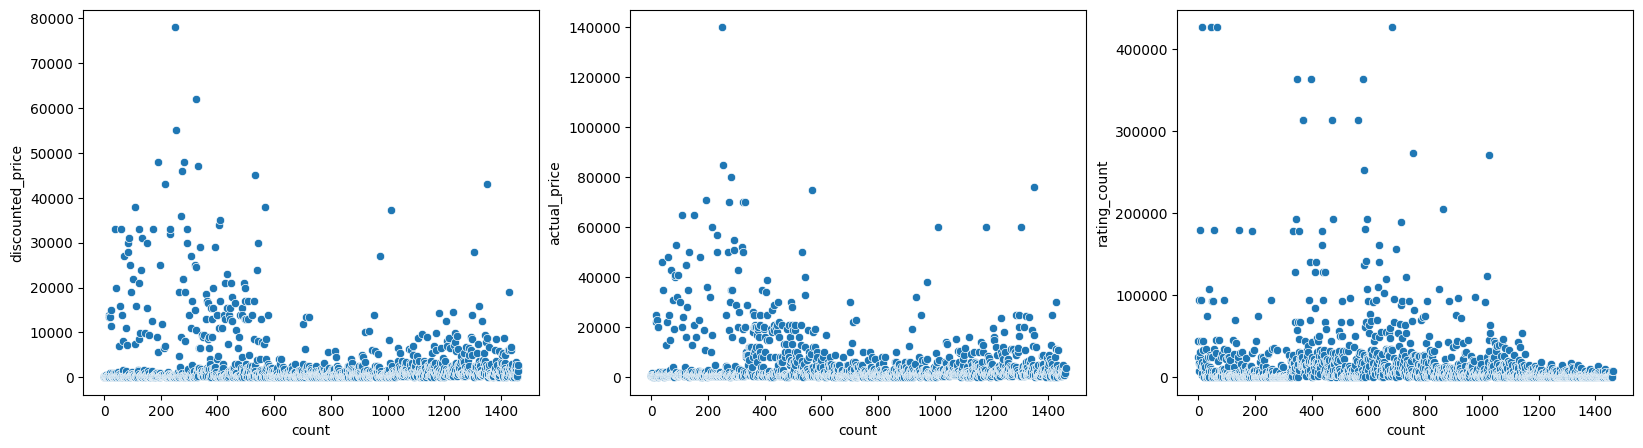

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(data = df, x = df.index, y = 'discounted_price')
plt.xlabel("count")

plt.subplot(1,3,2)
sns.scatterplot(data = df, x = df.index , y = 'actual_price')
plt.xlabel("count")


plt.subplot(1,3,3)
sns.scatterplot(data = df , x = df.index , y = 'rating_count')
plt.xlabel("count")


할인가와 정가에 각 하나의 값이 너무 높음

리뷰 수 경우 높긴하지만 분포상 큰 이상은 없어 보임

In [42]:
print(df['actual_price'].sort_values(ascending=False).head(1))
df['discounted_price'].sort_values(ascending=False).head(1)

249    139900.0
Name: actual_price, dtype: float64


249    77990.0
Name: discounted_price, dtype: float64

In [ ]:
# 가장 높은 139900을 기준으로 확인
df.iloc[249]

product_id                                                    B09WN3SRC7
product_name           Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...
category                                                     Electronics
discounted_price                                                 77990.0
actual_price                                                    139900.0
discount_percentage                                                 44.0
rating                                                               4.7
rating_count                                                      5935.0
about_product          Resolution: 4K Ultra HD (3840 x 2160) | Refres...
user_id                AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...
user_name              David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...
review_id              R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...
review_title           Product installation was excellent  but delive...
review_content         The delivery people were not

제품 특성과 할인율등을 생각해보면 납득이 되지 않을정도의 금액은 아님.이상치는 아니라고 판단

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   o

In [77]:
df1 = df[['category','rating','rating_count','discounted_price','actual_price','discount_percentage']]
df1

,category,rating,rating_count,discounted_price,actual_price,discount_percentage
0,Computers Accessories,4.2,24269.0,399.0,1099.0,64.0
1,Computers Accessories,4.0,43994.0,199.0,349.0,43.0
2,Computers Accessories,3.9,7928.0,199.0,1899.0,90.0
3,Computers Accessories,4.2,94363.0,329.0,699.0,53.0
4,Computers Accessories,4.2,16905.0,154.0,399.0,61.0
...,...,...,...,...,...,...
1457,Home Kitchen,4.0,1090.0,379.0,919.0,59.0
1458,Home Kitchen,4.1,4118.0,2280.0,3045.0,25.0
1459,Home Kitchen,3.6,468.0,2219.0,3080.0,28.0
1460,Home Kitchen,4.0,8031.0,1399.0,1890.0,26.0


In [83]:
category_rating = (df1.groupby('category')['rating'].mean().sort_values(ascending = False))
category_rating

category
OfficeProducts           4.309677
Toys Games               4.300000
HomeImprovement          4.250000
Computers Accessories    4.155654
Electronics              4.081749
Home Kitchen             4.040716
Health PersonalCare      4.000000
MusicalInstruments       3.900000
Car Motorbike            3.800000
Name: rating, dtype: float64

<Axes: ylabel='category'>

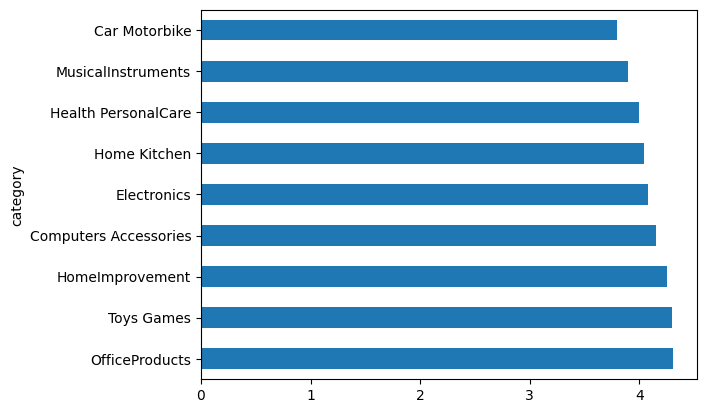

In [84]:
category_rating.plot(kind = 'barh')

OfficerProducts의 평점이 높긴하지만 리뷰 수에따라 달라지기 때문에 리뷰 수도 같이 확인

In [92]:
summary = df1.groupby('category')['rating_count'].count().sort_values(ascending= False)
summary

category
Electronics              526
Computers Accessories    451
Home Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Car Motorbike              1
Health PersonalCare        1
Toys Games                 1
Name: rating_count, dtype: int64

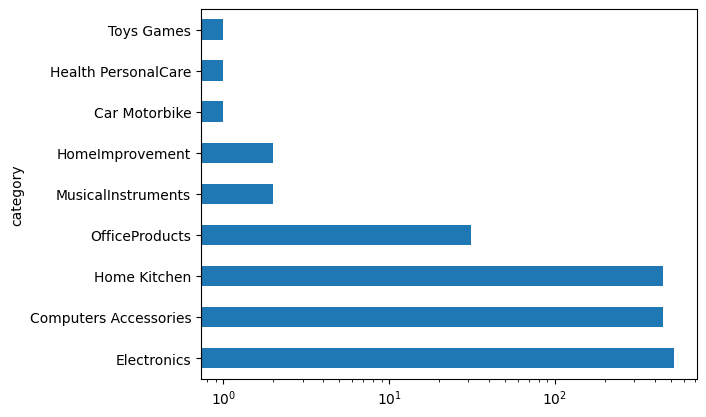

In [91]:
summary.plot(kind = 'barh')
plt.xscale('log')

###연습한 그래프에서의 해석
카테고리 별 평점 분포는 큰 차이 없이 고루 분포되어 있지만,

평점의 개수로 확인했을때 로그스케일을 써야할 만큼 리뷰수가 매우 적다.

이 데이터셋은 카테고리별 리뷰수에 큰 차이가 존재,

일부 핵심 카테고리에 리뷰가 집중되어 있다.